In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("13-car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
col_names = ["buying","maint","doors","persons","lug_boot","safety","class"]

In [6]:
df.columns = col_names

In [7]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
#class -> target variable, doors,persons ->numeric variable,preson.rest-;categorical

In [13]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [14]:
df["doors"]=df["doors"].replace('5more','5')

In [15]:
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [16]:
df["doors"]=df["doors"].astype(int)

In [17]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [18]:
df["persons"]=df["persons"].replace('more','5')

In [19]:
df["persons"]=df["persons"].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


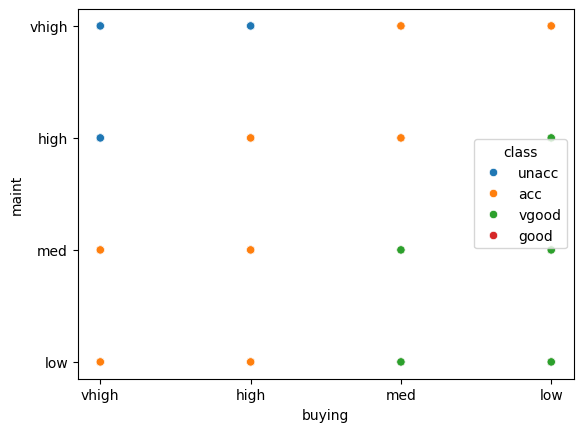

In [21]:
sns.scatterplot(x=df["buying"],y=df["maint"],hue=df["class"])
plt.show()

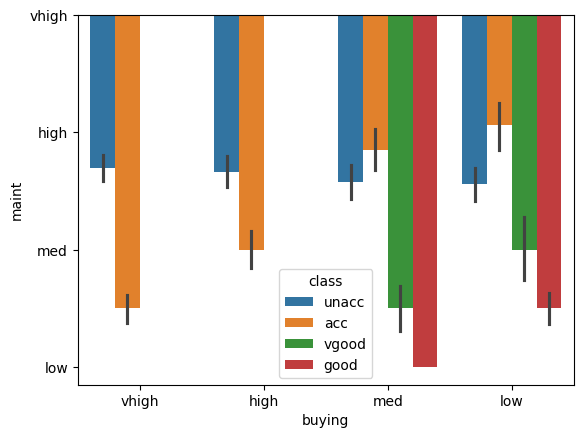

In [22]:
sns.barplot(x=df["buying"],y=df["maint"],hue=df["class"])
plt.show()

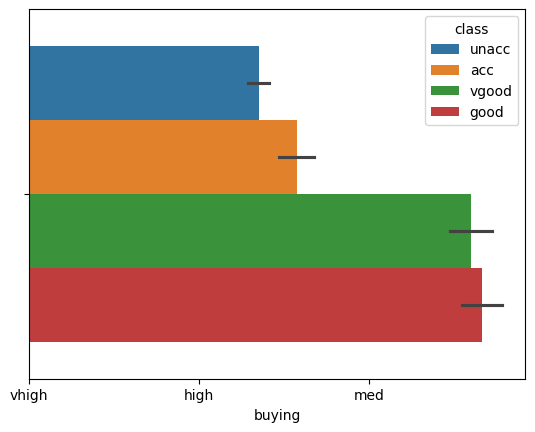

In [23]:
sns.barplot(x=df["buying"],hue=df["class"])
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [25]:
X=df.drop('class',axis=1)
y=df["class"]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape

(1381, 6)

In [28]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
categorical_cols = ["buying","maint","lug_boot","safety"]
numerical_cols = ["doors","persons"]

ordinal_encoder = OrdinalEncoder( categories=[
    ["low","med","high","vhigh"],#buying
    ["low","med","high","vhigh"],#maint
    ["small","med","big"],#lug_boot
    ["low","med","high"]#safety
])
preprocessor = ColumnTransformer( transformers=[
 ('transformation_name_doesnt_matter',ordinal_encoder,categorical_cols),#buraya istediğin kadar yazabilirisn
],remainder="passthrough")
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [39]:
pd.DataFrame(X_train_transformed)[4].unique()

array([2., 3., 5., 4.])

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree_model = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)

tree_model.fit(X_train_transformed,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [45]:
y_pred = tree_model.predict(X_test_transformed)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [47]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8121387283236994
[[ 49   0  28   0]
 [ 15   0   0   0]
 [  5   0 232   0]
 [ 17   0   0   0]]
              precision    recall  f1-score   support

         acc       0.57      0.64      0.60        77
        good       0.00      0.00      0.00        15
       unacc       0.89      0.98      0.93       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.81       346
   macro avg       0.37      0.40      0.38       346
weighted avg       0.74      0.81      0.77       346



C:\Users\AlperKömpe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AlperKömpe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AlperKömpe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.3333333333333333, 0.875, 'persons <= 0.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'safety <= 3.0\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'gini = 0.652\nsamples = 298\nvalue = [155, 54, 41, 48]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.499\nsamples = 317\nvalue = [152, 0, 165, 0]')]

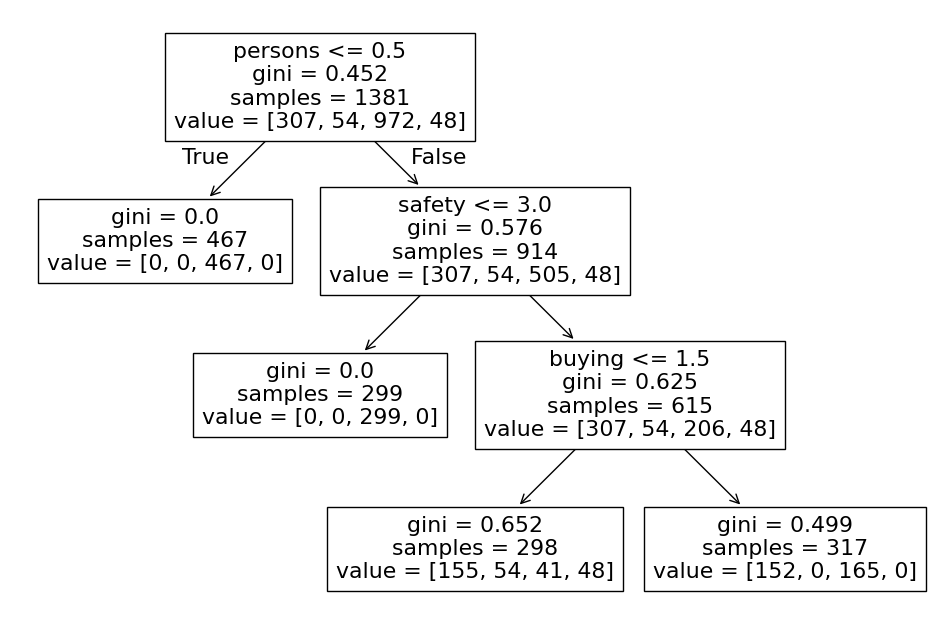

In [53]:
plt.figure(figsize=(12,8))
from sklearn import tree
column_names = categorical_cols + numerical_cols
tree.plot_tree(tree_model.fit(X_train_transformed,y_train),feature_names=col_names)

In [54]:
#hypermarameter tuning

In [61]:
param = {
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,15,None],
    "max_features":["sqrt","log2",None]
}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,cv=5,scoring="accuracy")

In [64]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [65]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'splitter': 'best'}

In [66]:
y_pred = grid.predict(X_test_transformed)

In [67]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9653179190751445
[[ 71   2   2   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]
              precision    recall  f1-score   support

         acc       0.96      0.92      0.94        77
        good       0.75      0.80      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346



In [73]:
tree_model_new = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=None,
    max_features=None,
    splitter="best"
)

In [74]:
tree_model_new.fit(X_train_transformed, y_train)

DecisionTreeClassifier(criterion='entropy')

In [75]:
y_pred = tree_model_new.predict(X_test_transformed)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9653179190751445
Confusion Matrix:
 [[ 71   2   2   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]
Classification Report:
               precision    recall  f1-score   support

         acc       0.96      0.92      0.94        77
        good       0.75      0.80      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346



[Text(0.6060606060606061, 0.9615384615384616, 'persons <= 0.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.5909090909090909, 0.8846153846153846, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.5984848484848485, 0.9230769230769231, 'True  '),
 Text(0.6212121212121212, 0.8846153846153846, 'safety <= 3.0\nentropy = 1.466\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.6136363636363636, 0.9230769230769231, '  False'),
 Text(0.6060606060606061, 0.8076923076923077, 'entropy = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6363636363636364, 0.8076923076923077, 'buying <= 1.5\nentropy = 1.624\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.4090909090909091, 0.7307692307692307, 'maint <= 1.5\nentropy = 1.755\nsamples = 298\nvalue = [155, 54, 41, 48]'),
 Text(0.2159090909090909, 0.6538461538461539, 'persons <= 1.5\nentropy = 1.773\nsamples = 150\nvalue = [49, 54, 7, 40]'),
 Text(0.09090909090909091, 0.5769230769230769, 'doors <= 0.5\n

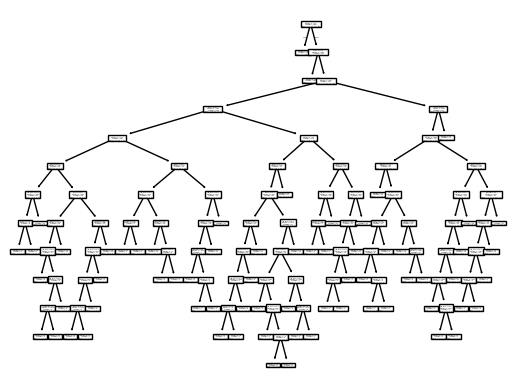

In [79]:
tree.plot_tree(tree_model_new.fit(X_train_transformed,y_train),feature_names=col_names)

In [91]:
#iris datası için yapacağım

In [80]:
df_new = pd.read_csv("11-iris.csv")

In [81]:
X=df_new.drop(["Id","Species"],axis=1)
y=df_new["Species"]

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
tree_model = DecisionTreeClassifier()

In [84]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'PetalLengthCm <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'PetalWidthCm <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'PetalWidthCm <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.3571428571428571

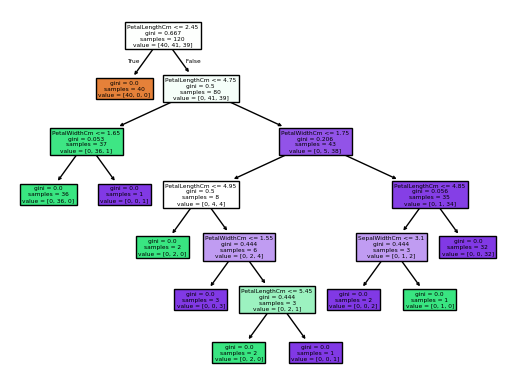

In [86]:
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns,filled=True)

In [87]:
y_pred = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [88]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



[Text(0.375, 0.875, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'PetalLengthCm <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'PetalWidthCm <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'PetalWidthCm <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

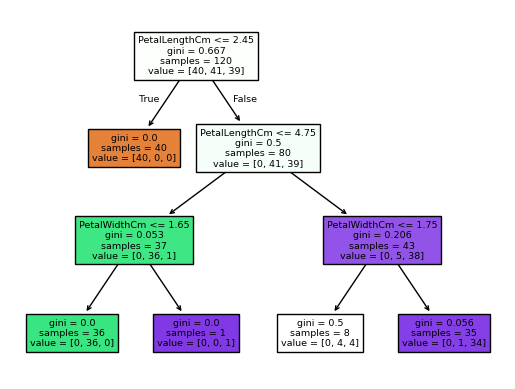

In [90]:
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns,filled=True)